In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
from preamble import *

# %matplotlib inline

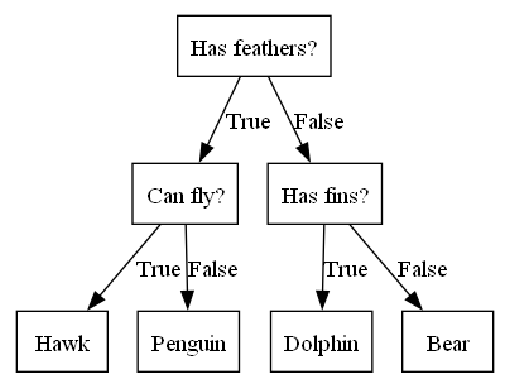

In [11]:
import sys
from IPython.display import display
sys.path
mglearn.plots.plot_animal_tree()

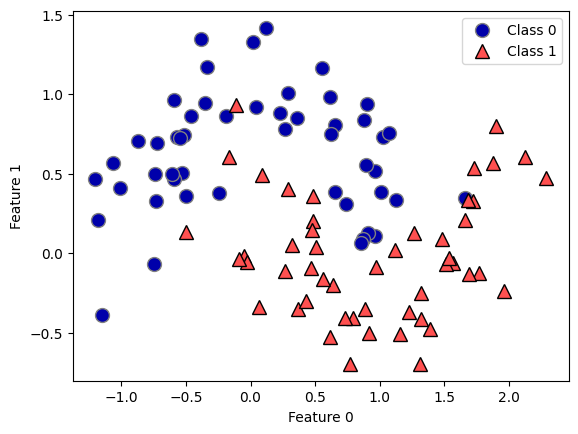

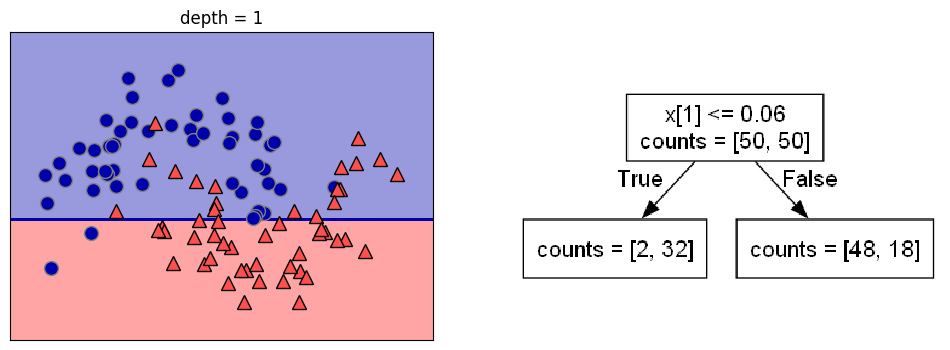

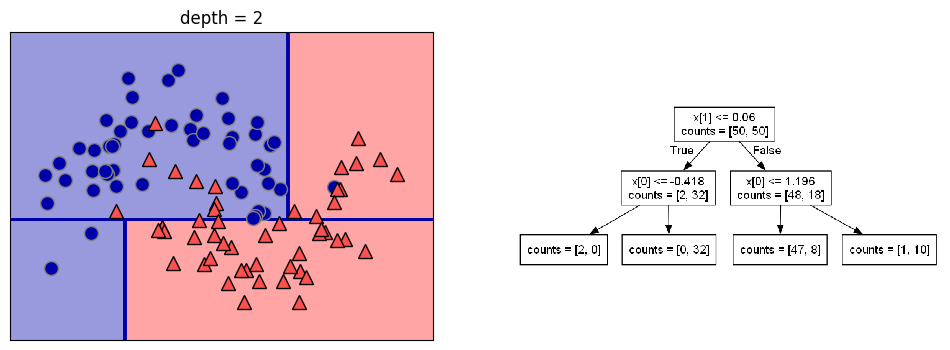

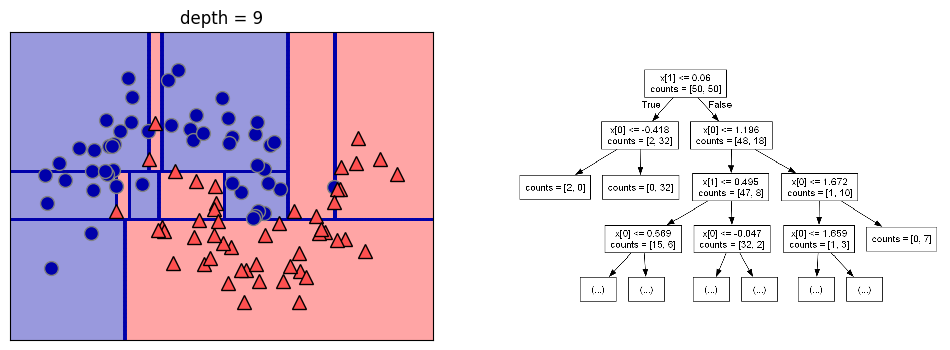

In [12]:
mglearn.plots.plot_tree_progressive()

## Classification

In [13]:
loans = pd.read_csv('https://raw.githubusercontent.com/KidQuant/datasets/main/supervised%20learning_activity_dataset.csv')

In [14]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [15]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,...,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.0,9578.00,9578.00,9578.00,...,9578.00,9578.00,9578.00,9578.00
mean,0.8,0.12,319.09,10.93,...,1.58,0.16,0.06,0.16
std,0.4,0.03,207.07,0.61,...,2.20,0.55,0.26,0.37
min,0.0,0.06,15.67,7.55,...,0.00,0.00,0.00,0.00
25%,1.0,0.10,163.77,10.56,...,0.00,0.00,0.00,0.00
50%,1.0,0.12,268.95,10.93,...,1.00,0.00,0.00,0.00
75%,1.0,0.14,432.76,11.29,...,2.00,0.00,0.00,0.00
max,1.0,0.22,940.14,14.53,...,33.00,13.00,5.00,1.00


In [16]:
loans.head()

,credit.policy,purpose,int.rate,installment,...,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.12,829.10,...,0,0,0,0
1,1,credit_card,0.11,228.22,...,0,0,0,0
2,1,debt_consolidation,0.14,366.86,...,1,0,0,0
3,1,debt_consolidation,0.10,162.34,...,1,0,0,0
4,1,credit_card,0.14,102.92,...,0,1,0,0


Text(0.5, 0, 'FICO')

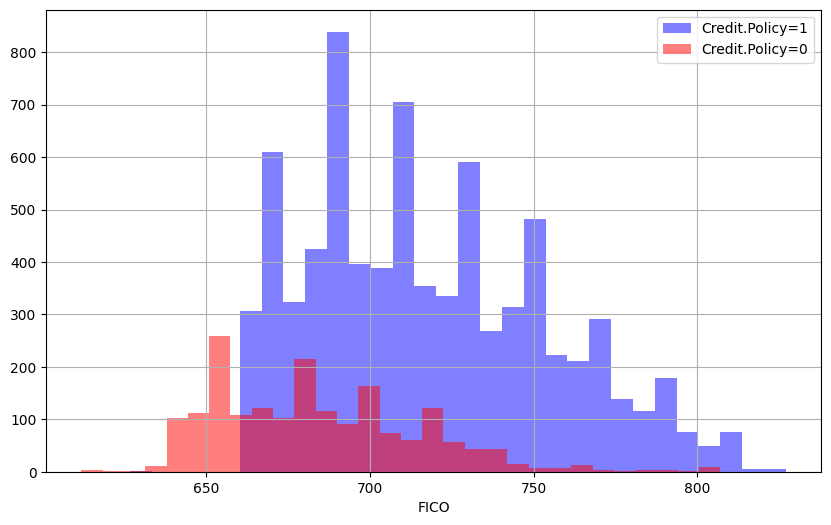

In [17]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

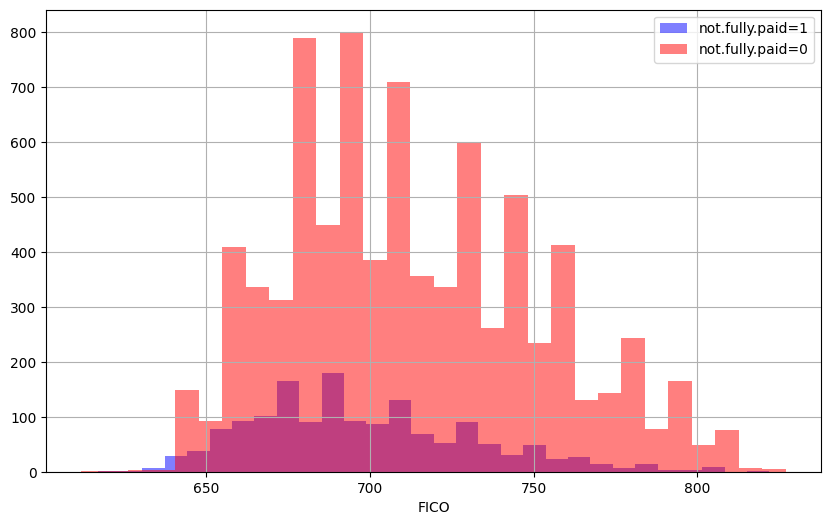

In [18]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

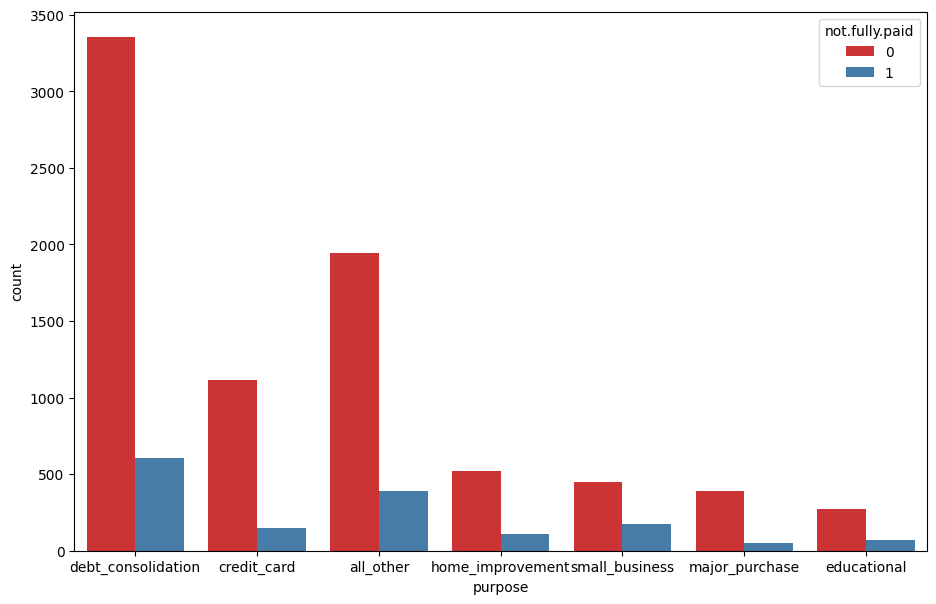

In [19]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

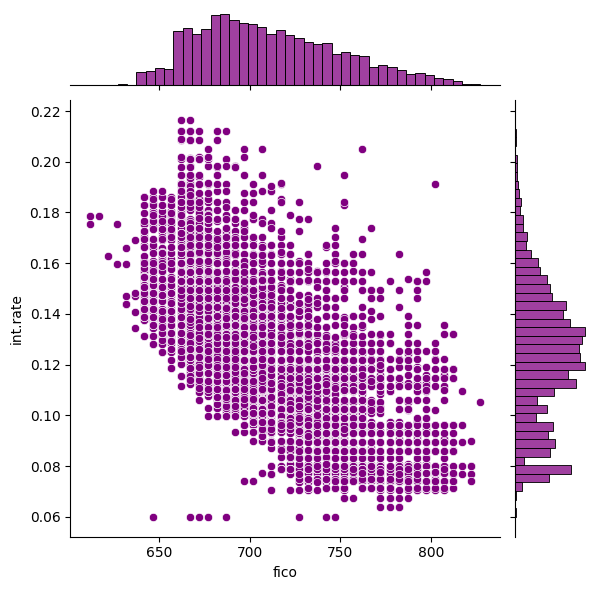

In [20]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 1100x700 with 0 Axes>

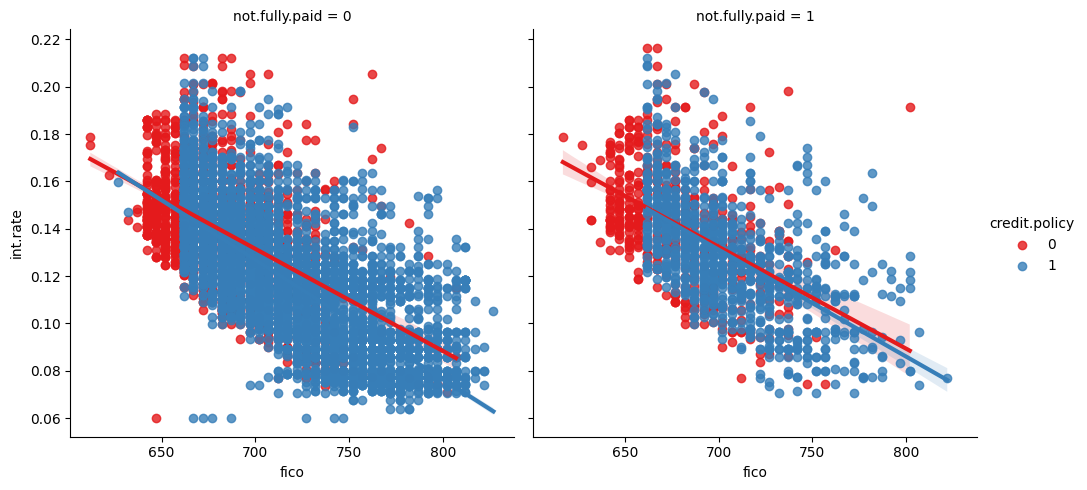

In [21]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

## Setting Up The Data

In [22]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [23]:
final_data = pd.get_dummies(loans,columns=['purpose'],drop_first=True, dtype=float)
final_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [24]:
# Import the sklearn package
from sklearn.model_selection import train_test_split

In [25]:
# Split the dataset into training and testing dataset
# test_size = from 0 to 1 and is the percentage of the data that should be used for testing
# for X drop the target variable
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
predictions = dtree.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.23      0.21       443

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.74      2874



In [32]:
print(confusion_matrix(y_test,predictions))

[[2009  422]
 [ 339  104]]


In [33]:
data = pd.read_csv('https://raw.githubusercontent.com/KidQuant/datasets/main/loans.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,...,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,...,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,...,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,...,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,...,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,...,360.0,1.0,Urban,Y


In [34]:
data.shape

(381, 13)

In [35]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.00,381.00,381.00,370.00,351.00
mean,3579.85,1277.28,104.99,340.86,0.84
std,1419.81,2340.82,28.36,68.55,0.37
min,150.00,0.00,9.00,12.00,0.00
25%,2600.00,0.00,90.00,360.00,1.00
50%,3333.00,983.00,110.00,360.00,1.00
75%,4288.00,2016.00,127.00,360.00,1.00
max,9703.00,33837.00,150.00,480.00,1.00


In [37]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [38]:
data.isnull().sum() 

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
categorical_columns=[col for col in data.columns if data[col].dtype=='O']
categorical_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [40]:
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\drebi\AppData\Local\Temp\ipykernel_49896\1000206799.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [41]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

C:\Users\drebi\AppData\Local\Temp\ipykernel_49896\3294029491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)


In [42]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

C:\Users\drebi\AppData\Local\Temp\ipykernel_49896\3682394416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)


In [43]:
data.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
# Drop Unnecessary Columns
data.drop('Loan_ID', axis=1, inplace=True)

In [45]:
# Handling datatypes 
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [46]:
data['Dependents'] = data['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3])

C:\Users\drebi\AppData\Local\Temp\ipykernel_49896\1785700473.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Dependents'] = data['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3])


In [47]:
data.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [48]:
data['Credit_History'] = data['Credit_History'].astype(int)

In [49]:
data.head()

,Gender,Married,Dependents,Education,...,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,...,360.0,1,Rural,N
1,Male,Yes,0,Graduate,...,360.0,1,Urban,Y
2,Male,Yes,0,Not Graduate,...,360.0,1,Urban,Y
3,Male,No,0,Graduate,...,360.0,1,Urban,Y
4,Male,Yes,0,Not Graduate,...,360.0,1,Urban,Y


In [50]:
label_encoder_columns = ['Gender', 'Married', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in label_encoder_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [51]:
data.head()

,Gender,Married,Dependents,Education,...,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,...,360.0,1,0,0
1,1,1,0,0,...,360.0,1,2,1
2,1,1,0,1,...,360.0,1,2,1
3,1,0,0,0,...,360.0,1,2,1
4,1,1,0,1,...,360.0,1,2,1


<Axes: >

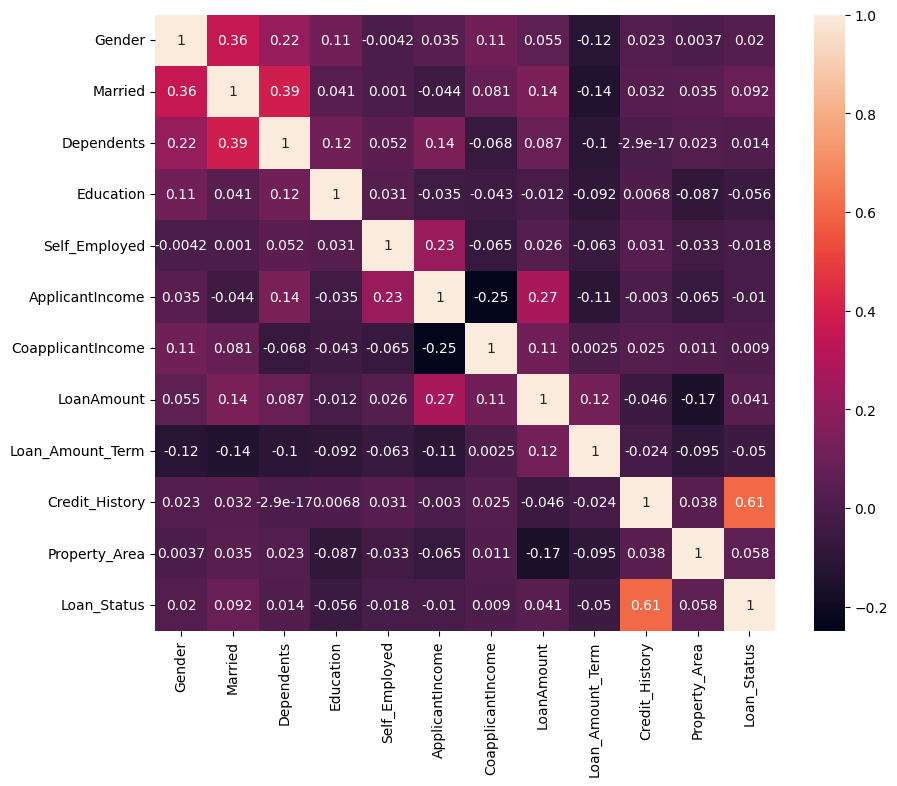

In [53]:
plt.figure(figsize=(10,8))
corr_df = data.corr()
sns.heatmap(corr_df, annot=True)

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

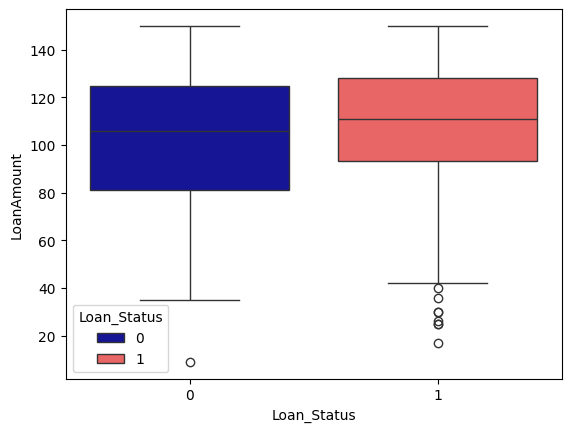

In [54]:
sns.boxplot(data=data, x='Loan_Status', y='LoanAmount', hue='Loan_Status')

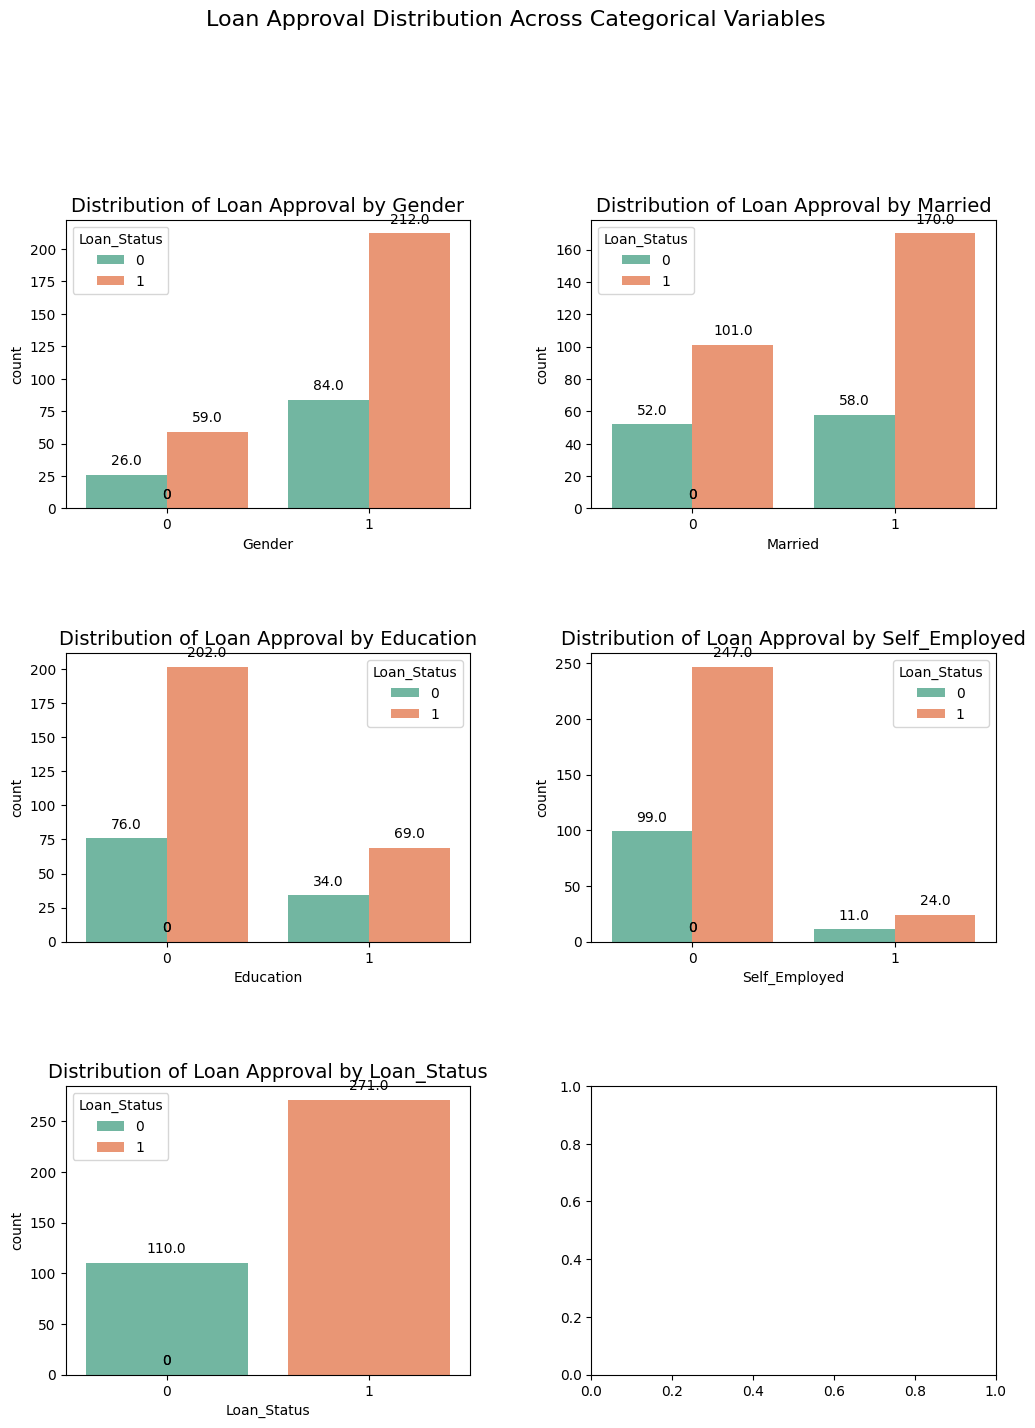

In [55]:
categorical_columns = ['Gender', 'Married', 'Education','Self_Employed', 'Loan_Status']

fig, ax = plt.subplots(3, 2, figsize=(12, 15))

# Loop through categorical columns for visualization
for index, cat_col in enumerate(categorical_columns):
    row, col = index // 2, index % 2
    sns.countplot(x=cat_col, data=data, hue='Loan_Status', ax=ax[row, col], palette='Set2')
    
    # Add title
    ax[row, col].set_title(f'Distribution of Loan Approval by {cat_col}', fontsize=14)

    # Add annotations for better readability
    for p in ax[row, col].patches:
        ax[row, col].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Add overall title
plt.suptitle('Loan Approval Distribution Across Categorical Variables', fontsize=16, y=1.02)

# Show the plot
plt.show()

C:\Users\drebi\AppData\Local\Temp\ipykernel_49896\2605319233.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=num_col, data=data, ax=axes[idx], palette='Set2')
C:\Users\drebi\AppData\Local\Temp\ipykernel_49896\2605319233.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=num_col, data=data, ax=axes[idx], palette='Set2')
C:\Users\drebi\AppData\Local\Temp\ipykernel_49896\2605319233.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=num_col, data=data, ax=axes[idx], palette='Set2')
C

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count           381.00             381.00      381.00            381.00
mean           3579.85            1277.28      104.99            341.42
std            1419.81            2340.82       28.36             67.63
min             150.00               0.00        9.00             12.00
25%            2600.00               0.00       90.00            360.00
50%            3333.00             983.00      110.00            360.00
75%            4288.00            2016.00      127.00            360.00
max            9703.00           33837.00      150.00            480.00


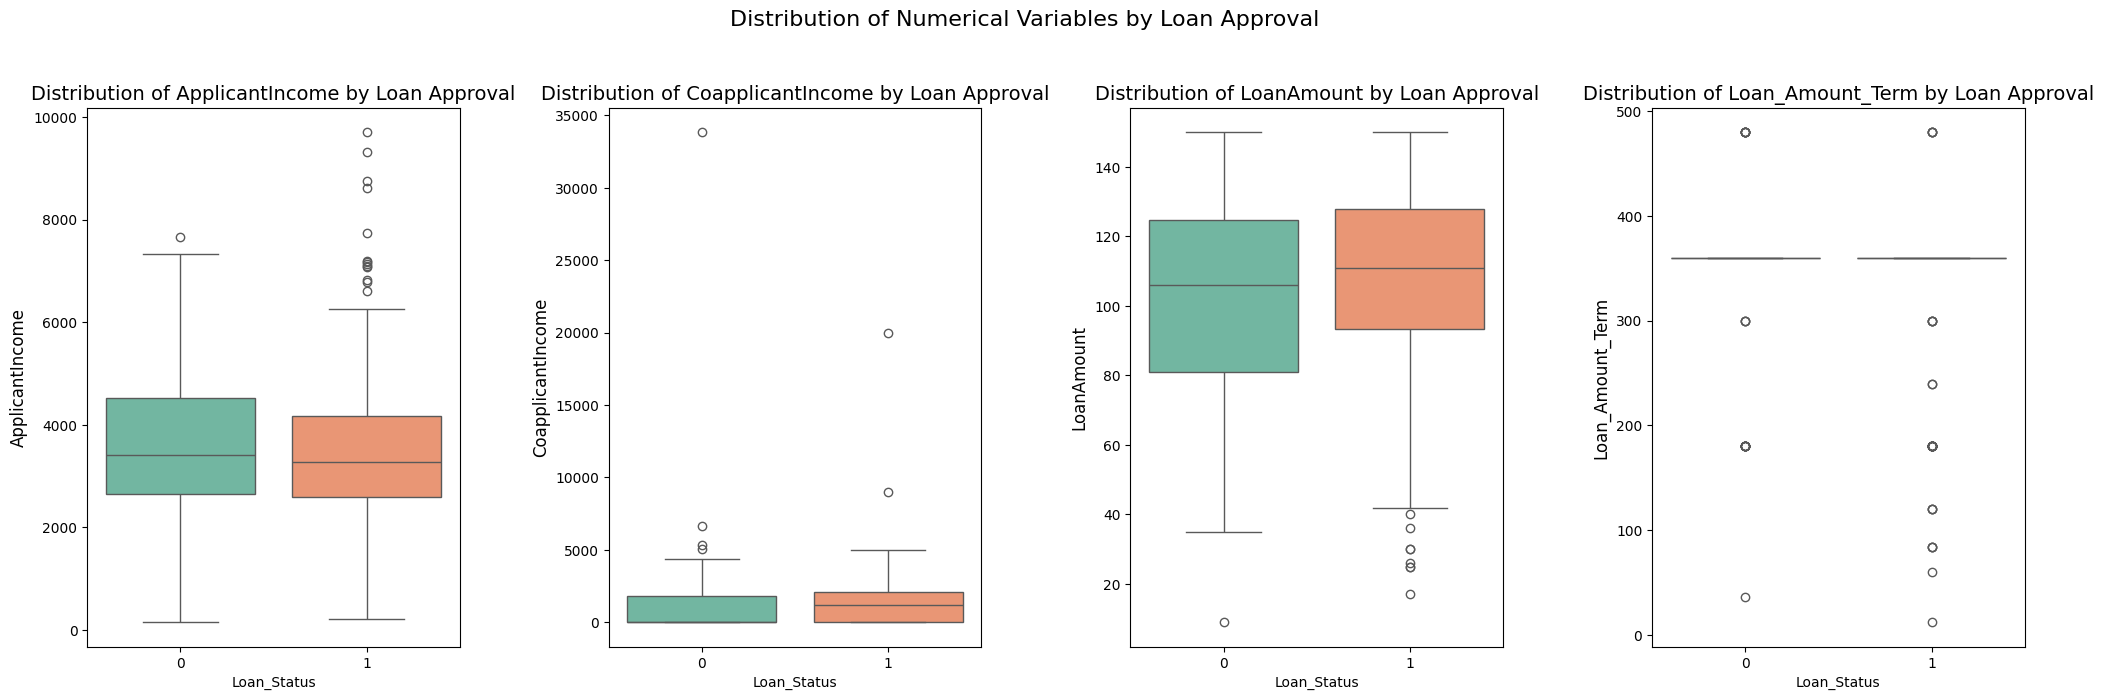

In [56]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

fig, axes = plt.subplots(1, 4, figsize=(25, 7))

# Loop through numerical columns for visualization
for idx, num_col in enumerate(numerical_columns):
    sns.boxplot(x='Loan_Status', y=num_col, data=data, ax=axes[idx], palette='Set2')
    
    # Add title
    axes[idx].set_title(f'Distribution of {num_col} by Loan Approval', fontsize=14)
    
    # Add y-axis label
    axes[idx].set_ylabel(num_col, fontsize=12)

# Add overall title
plt.suptitle('Distribution of Numerical Variables by Loan Approval', fontsize=16, y=1.02)

# Adjust layout for better spacing
plt.subplots_adjust(wspace=0.4)

# Display summary statistics
print(data[numerical_columns].describe())

# Show the plot
plt.show()

In [57]:
ind_col = [col for col in data.columns if col != 'Loan_Status']
dep_col = 'Loan_Status'

In [58]:
X = data[ind_col]
y = data[dep_col]

X.head()

,Gender,Married,Dependents,Education,...,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,...,128,360.0,1,0
1,1,1,0,0,...,66,360.0,1,2
2,1,1,0,1,...,120,360.0,1,2
3,1,0,0,0,...,141,360.0,1,2
4,1,1,0,1,...,95,360.0,1,2


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [60]:
print(X_train.shape)
print(X_test.shape)

(304, 11)
(77, 11)


In [61]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
rf_classifier = RandomForestClassifier(n_estimators = 50, 
                                       min_samples_split = 10, 
                                       min_samples_leaf = 4, 
                                       max_features = 'sqrt', 
                                       max_depth = 30, bootstrap = True)

In [62]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50)

In [63]:
rf_pred = rf_classifier.predict(X_test)

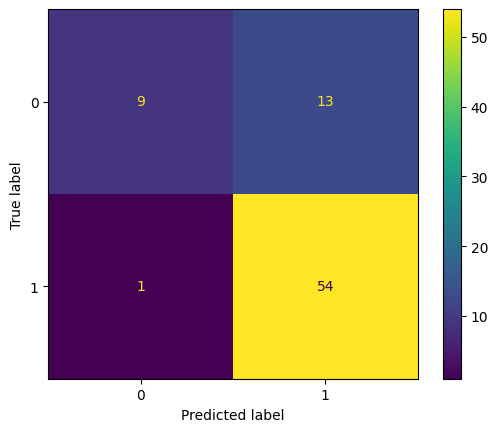

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_rf = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_rf,
                              display_labels=rf_classifier.classes_)
disp.plot()

plt.show()

In [65]:
from sklearn.metrics import accuracy_score

# Accuracy of Random Forest
RF_accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy of Random Forest:")
print(RF_accuracy)

Accuracy of Random Forest:
0.8181818181818182


In [66]:
from sklearn.metrics import auc, roc_curve

y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


Text(0.5, 1.0, 'Random Forest\nAccuracy: 81.82%')

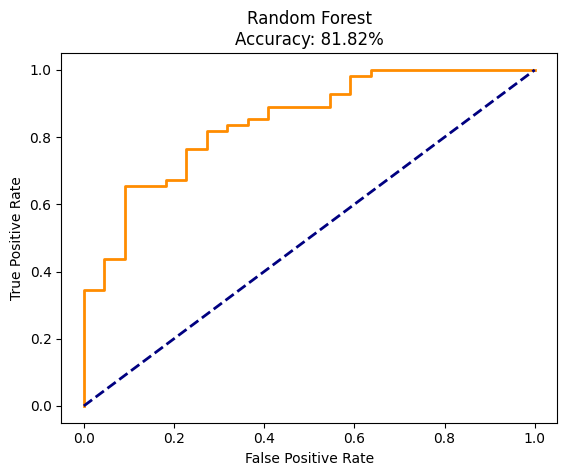

In [67]:
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest\nAccuracy: {:.2f}%'.format(RF_accuracy * 100))

## Regression

In [5]:
file = "https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv"
df = pd.read_csv(file, header=1)
df.head()

,CRIM,ZN,INDUS,CHAS,...,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,...,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,...,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,...,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,...,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,...,18.7,396.90,5.33,36.2


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
corr = df.corr()
print(corr)

         CRIM    ZN  INDUS      CHAS  ...  PTRATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -5.59e-02  ...     0.29 -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -4.27e-02  ...    -0.39  0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  6.29e-02  ...     0.38 -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00e+00  ...    -0.12  0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  9.12e-02  ...     0.19 -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  9.13e-02  ...    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  8.65e-02  ...     0.26 -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -9.92e-02  ...    -0.23  0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -7.37e-03  ...     0.46 -0.44   0.49 -0.38
TAX      0.58 -0.31   0.72 -3.56e-02  ...     0.46 -0.44   0.54 -0.47
PTRATIO  0.29 -0.39   0.38 -1.22e-01  ...     1.00 -0.18   0.37 -0.51
B       -0.39  0.18  -0.36  4.88e-02  ...    -0.18  1.00  -0.37  0.33
LSTAT    0.46 -0.41   0.60 -5.39e-02  ...     0.37 -0.37   1.00 -0.74
MEDV    -0.39  0.36 

<Axes: >

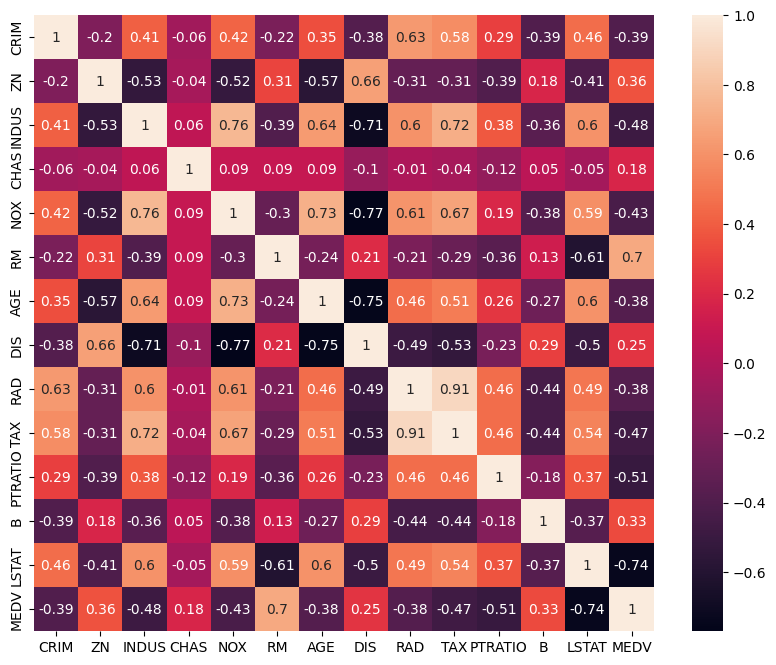

In [8]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation_matrix, annot=True)

In [9]:
df.corr().abs().nlargest(3, 'MEDV').index

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')

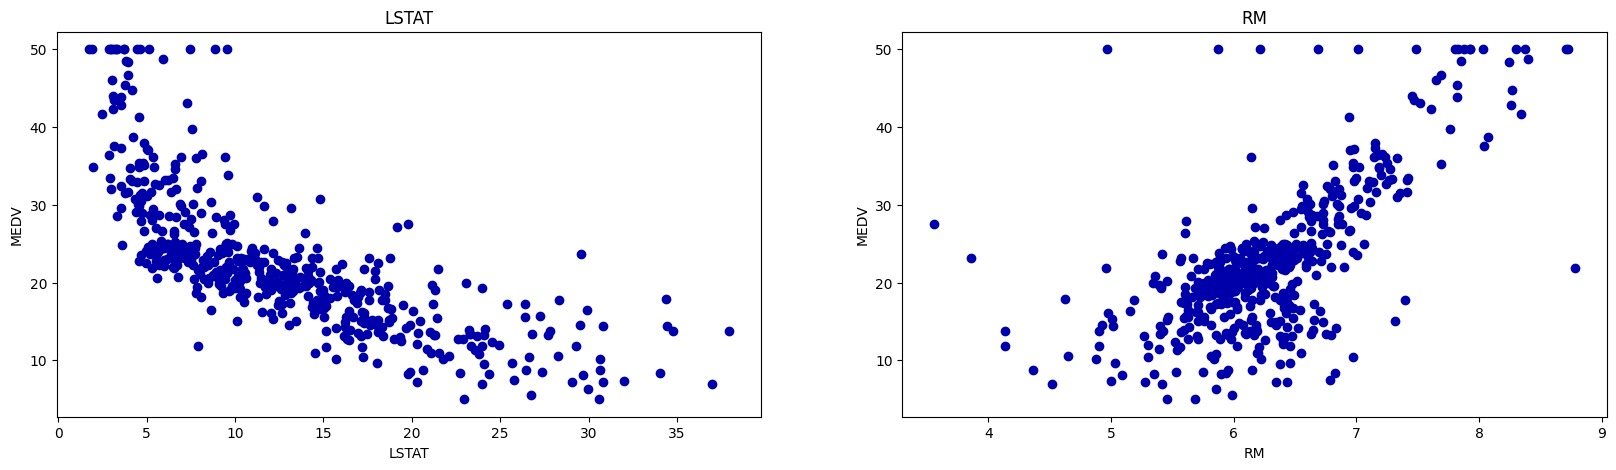

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

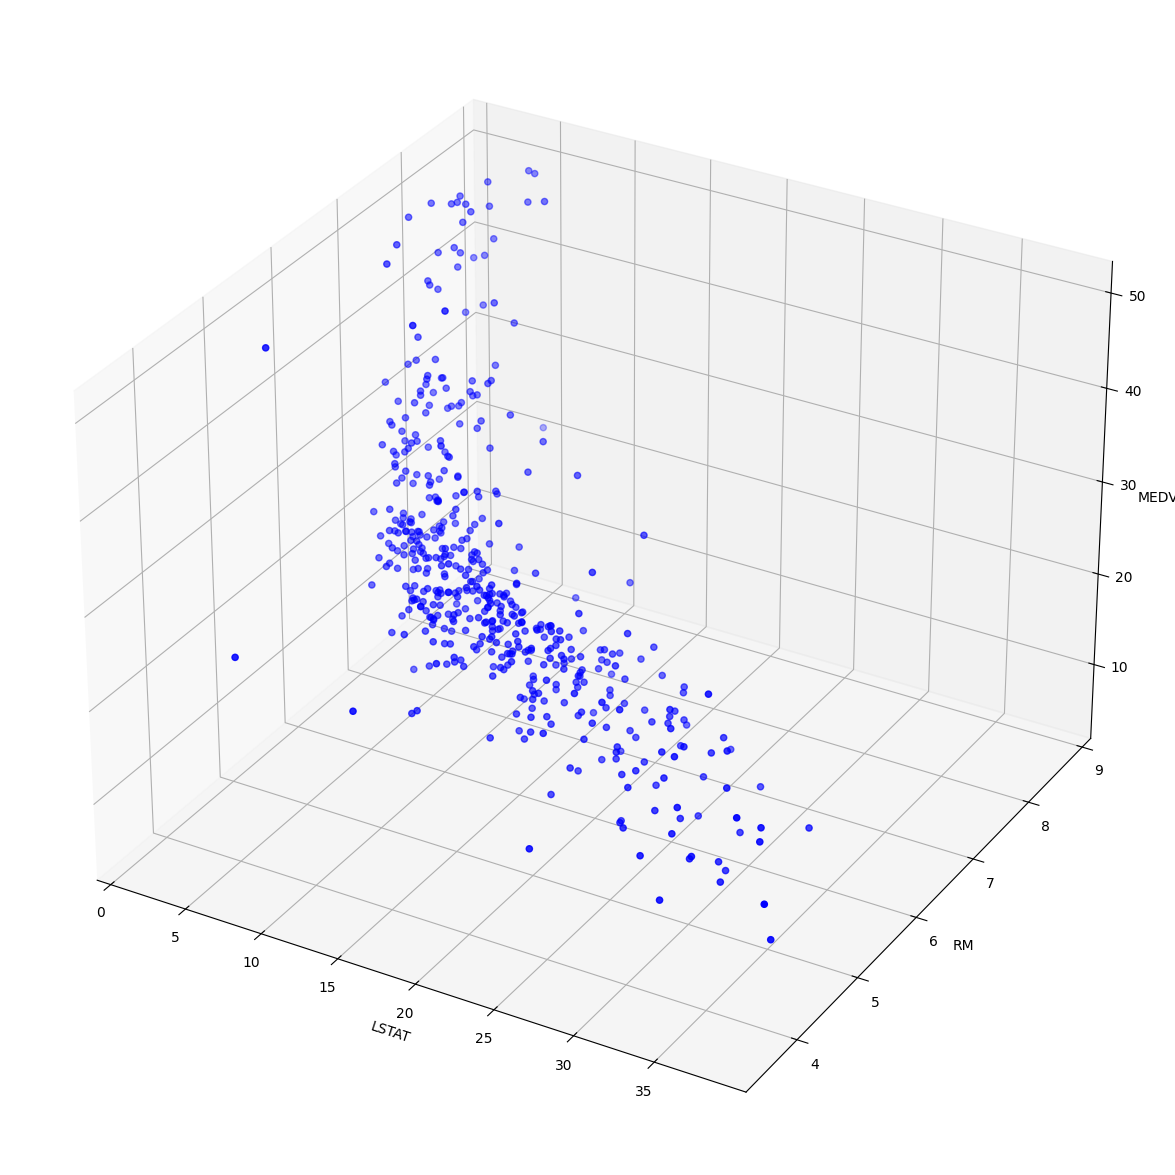

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'],
df['RM'],
df['MEDV'],
c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

In [12]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

NameError: name 'boston' is not defined

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

NameError: name 'train_test_split' is not defined

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

NameError: name 'X_train' is not defined

In [44]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


<Axes: xlabel='MEDV'>

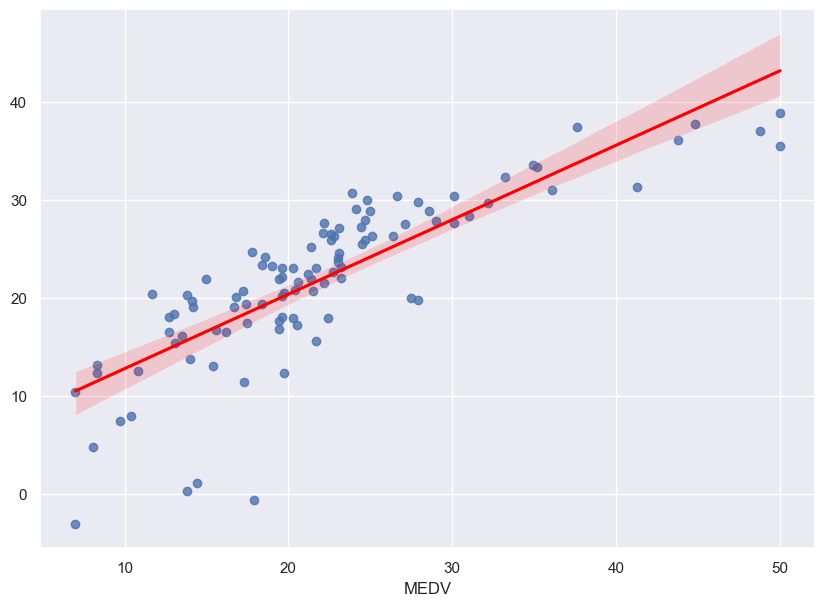

In [45]:
plt.figure(figsize=(10,7))

sns.regplot(x=Y_test, y=y_test_predict, line_kws={'color':'red'})



In [58]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(lin_model, boston[features], boston['MEDV'], cv=)

In [59]:
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.65864407  0.68175316  0.4026017   0.1817464  -0.37691789]


In [60]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.31


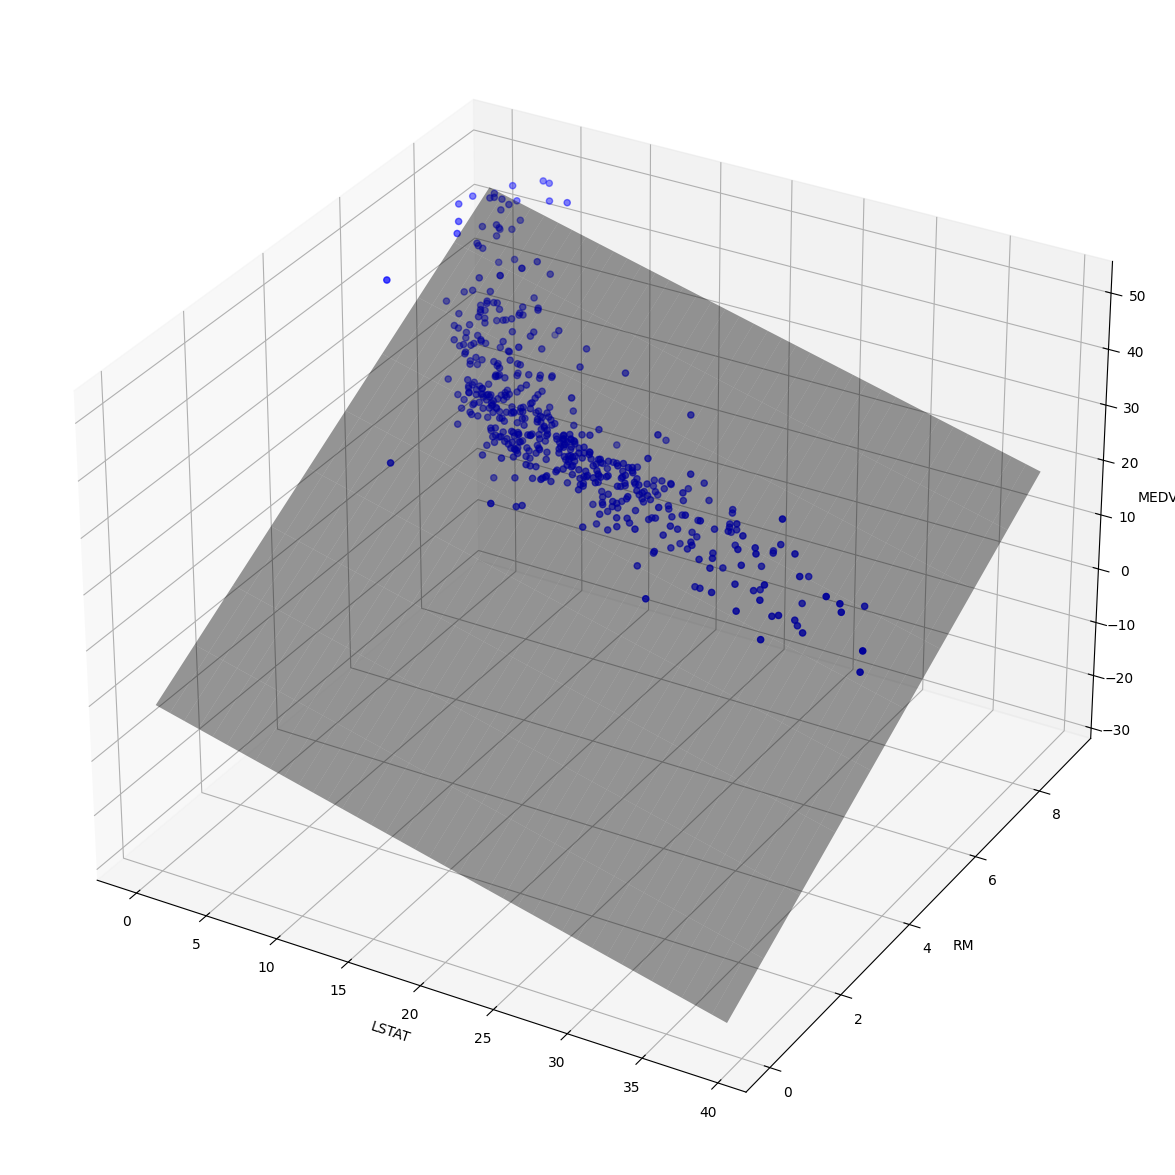

In [77]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---

x_surf = np.arange(0, 40, 1) #---for LSTAT---
y_surf = np.arange(0, 10, 1) #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)
plt.show()